In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = r'D:\Work\Master\An 2\TAIP\data'
MITBIH_TRAIN = os.path.join(DATA_DIR, 'mitbih_train.csv')
MITBIH_TEST = os.path.join(DATA_DIR, 'mitbih_test.csv')
PTBDB_ABNORMAL = os.path.join(DATA_DIR, 'ptbdb_abnormal.csv')
PTBDB_NORMAL = os.path.join(DATA_DIR, 'ptbdb_normal.csv')

In [3]:
train_df = pd.read_csv(MITBIH_TRAIN, header=None)
last_col = len(train_df.columns) - 1
print(last_col)
train_df[last_col] = train_df[last_col].astype(int)
train_df[last_col].value_counts()

187


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [17]:
def plot_hist(class_number, begin, end, ignore_less_than=-float('inf'), ax=None):
    img = train_df.loc[train_df[last_col]==class_number].drop(columns=[last_col]).values
    img = img[:, begin:end]
    img_flat = img.flatten()

    indexes = np.arange(0, img.shape[1])
    indexes = np.tile(indexes, img.shape[0])
    print(indexes)
    
    valid = img_flat >= ignore_less_than
    valid_percent = np.sum(valid) / len(img_flat) * 100
    invalid_percent = 100 - valid_percent
    
    print(f'valid_percent={valid_percent:.2f}%')
    print(f'invalid_percent={invalid_percent:.2f}%')
    
    indexes = indexes[valid]
    img_flat = img_flat[valid]
    
    if ax is None:
        ax = plt
     
    ax.hist2d(indexes, img_flat, bins=(40, 40),cmap=plt.cm.jet)

[ 0  1  2 ... 75 76 77]
valid_percent=100.00%
invalid_percent=0.00%
[  0   1   2 ... 176 177 178]
valid_percent=100.00%
invalid_percent=0.00%
[  0   1   2 ... 175 176 177]
valid_percent=100.00%
invalid_percent=0.00%
[  0   1   2 ... 176 177 178]
valid_percent=42.24%
invalid_percent=57.76%
[ 0  1  2 ... 76 77 78]
valid_percent=98.31%
invalid_percent=1.69%


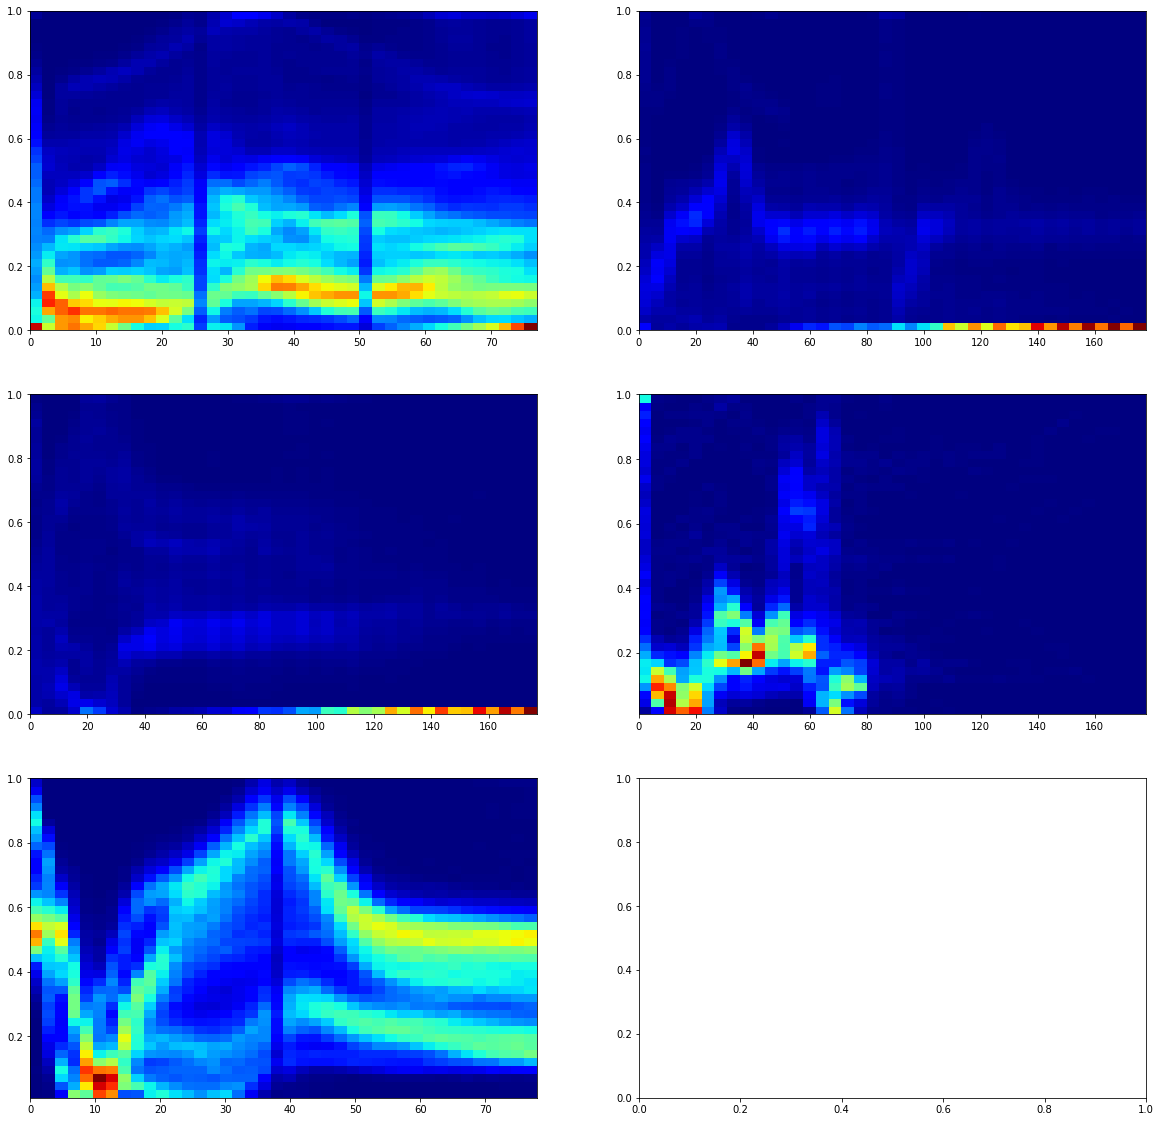

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
def ax(i):
    ax_i = i // 2
    ax_j = i % 2
    return axes[ax_i][ax_j]
    
plot_hist(0, begin=2, end=80, ignore_less_than=0.00, ax=ax(0))
plot_hist(1, begin=1, end=180,  ignore_less_than=0.00, ax=ax(1))
plot_hist(2, begin=2, end=180, ignore_less_than=0.00, ax=ax(2))
plot_hist(3, begin=1, end=180, ignore_less_than=0.01, ax=ax(3))
plot_hist(4, begin=1, end=80, ignore_less_than=0.01, ax=ax(4))

[ 0  1  2 ... 75 76 77]
valid_count=162977
invalid_count=10417


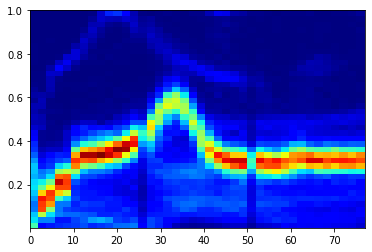

In [239]:
plot_hist(1, begin=2, end=80, ignore_less_than=0.001)

In [65]:
by_class_df = train_df.groupby(last_col)

In [121]:
g3 = train_df.iloc[by_class_df.groups[3]]
g3 = g3.drop(columns=[last_col])

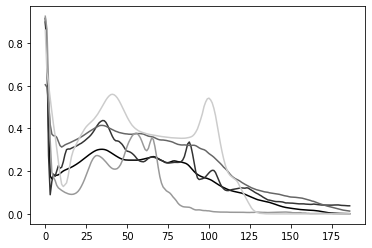

In [66]:
for i in range(5):
    ci = i / 5
    c = (ci, ci, ci)
    plt.plot(by_class_df.mean().iloc[i], color=c)
plt.show()

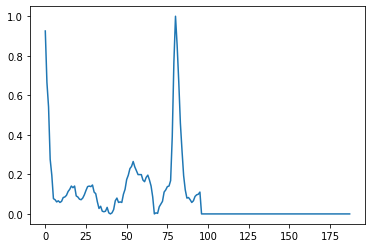

In [26]:
i = 3
arr = np.array(train.iloc[i])
arr

plt.plot(arr)